In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
duplicates_all = df[df.duplicated(keep = False)]
print(duplicates_all)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [6]:
# Checking data types
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#Checking outlier data
from scipy import stats
#Calculate Z-Score
z_scores = np.abs(stats.zscore(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]))
print(f"Z-scores", z_scores)

Z-scores [[1.42456879 1.73899919 0.43480148]
 [1.28103541 1.73899919 1.19570407]
 [1.3528021  1.70082976 1.71591298]
 [1.13750203 1.70082976 1.04041783]
 [0.56336851 1.66266033 0.39597992]
 [1.20926872 1.66266033 1.00159627]
 [0.27630176 1.62449091 1.71591298]
 [1.13750203 1.62449091 1.70038436]
 [1.80493225 1.58632148 1.83237767]
 [0.6351352  1.58632148 0.84631002]
 [2.02023231 1.58632148 1.4053405 ]
 [0.27630176 1.58632148 1.89449216]
 [1.37433211 1.54815205 1.36651894]
 [1.06573534 1.54815205 1.04041783]
 [0.13276838 1.54815205 1.44416206]
 [1.20926872 1.54815205 1.11806095]
 [0.27630176 1.50998262 0.59008772]
 [1.3528021  1.50998262 0.61338066]
 [0.94373197 1.43364376 0.82301709]
 [0.27630176 1.43364376 1.8556706 ]
 [0.27630176 1.39547433 0.59008772]
 [0.99396865 1.39547433 0.88513158]
 [0.51313183 1.3573049  1.75473454]
 [0.56336851 1.3573049  0.88513158]
 [1.08726535 1.24279661 1.4053405 ]
 [0.70690189 1.24279661 1.23452563]
 [0.44136514 1.24279661 0.7065524 ]
 [0.27630176 1.2427

In [9]:
# Check if any outliers
df['outliers'] = (z_scores > 3).all(axis=1)

# filter outliers and show
df_outliers = df[df['outliers'] == True]
print("\nOutliers:\n", df_outliers)



Outliers:
 Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), outliers]
Index: []


In [10]:
#Drop irrelevant columns for model analysis
df = df.drop(columns="CustomerID")

In [11]:
#Create column for encoding 'Gender' column
df['gender_encoded'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),outliers,gender_encoded
0,Male,19,15,39,False,0
1,Male,21,15,81,False,0
2,Female,20,16,6,False,1
3,Female,23,16,77,False,1
4,Female,31,17,40,False,1
...,...,...,...,...,...,...
195,Female,35,120,79,False,1
196,Female,45,126,28,False,1
197,Male,32,126,74,False,0
198,Male,32,137,18,False,0


In [12]:
#Normalization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] =scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),outliers,gender_encoded
0,Male,-1.424569,-1.738999,-0.434801,False,0
1,Male,-1.281035,-1.738999,1.195704,False,0
2,Female,-1.352802,-1.700830,-1.715913,False,1
3,Female,-1.137502,-1.700830,1.040418,False,1
4,Female,-0.563369,-1.662660,-0.395980,False,1


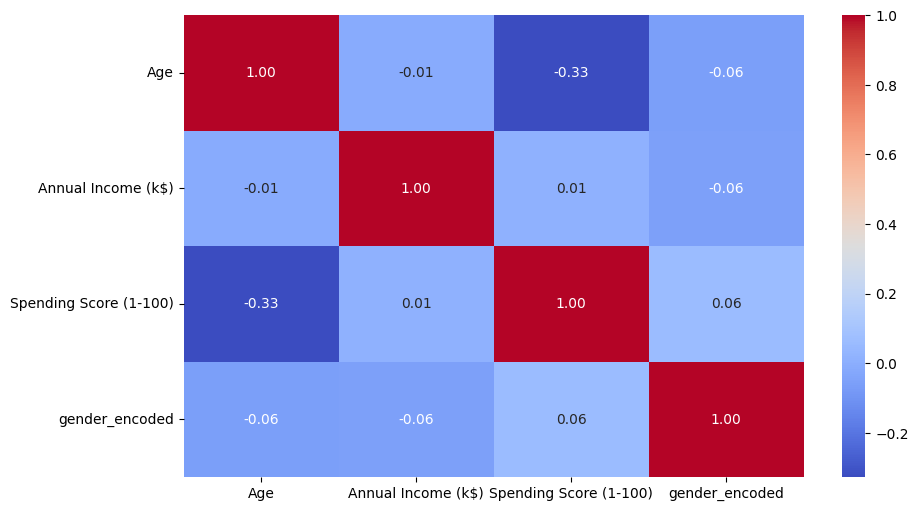

In [13]:
# Correlation Analysis 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Text(0.5, 1.0, 'Customer Segmentation')

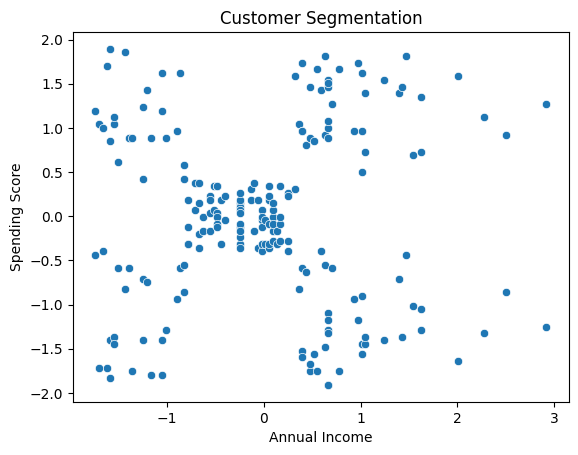

In [14]:
sns.scatterplot(x=df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')


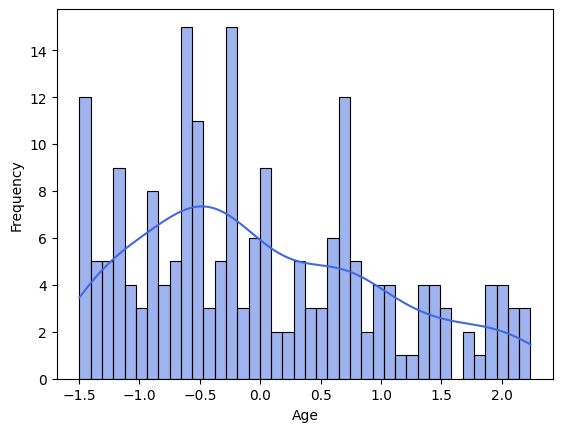

In [15]:
sns.histplot(df['Age'], bins=40, kde=True, color="royalblue")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

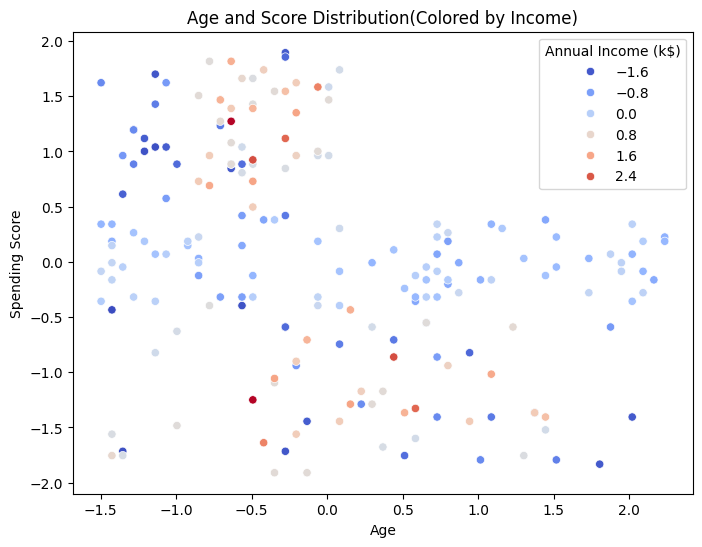

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Annual Income (k$)'], palette = 'coolwarm')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age and Score Distribution(Colored by Income)')
plt.show()

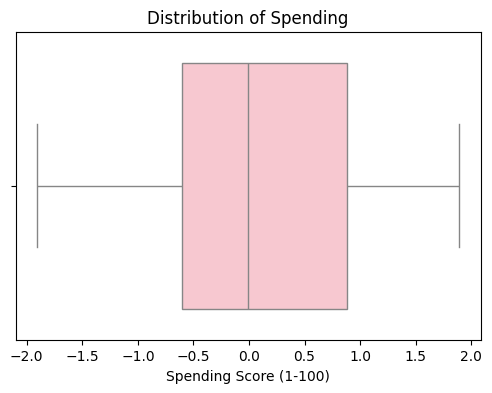

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df['Spending Score (1-100)'], color="#FFC0CB")
plt.title('Distribution of Spending')
plt.show()

In [18]:
df.to_csv("cleaned_data.csv", index=False)